In [1]:
from DataPreprocessing.python.Data import *

In [8]:
data = Data()
data.addFile("Root_Insurance_data.csv")
data.loadData()
data.splitData(fraction=[0.6,0,0.4])
df_data = data.getDataCopy()
df_data.head(5)
#isinstance(df_data, pd.DataFrame)

,Currently Insured,Number of Vehicles,Number of Drivers,Marital Status,bid,rank,click,policies_sold
0,unknown,2,1,M,10.0,2,False,0
1,Y,3,1,M,10.0,5,False,0
2,Y,3,2,M,10.0,5,False,0
3,N,3,2,S,10.0,4,False,0
4,unknown,2,2,S,10.0,2,False,0


In [30]:
set_of_combinations = set()
for i in df_data.values:
    set_of_combinations.add(tuple(i[:4]))
list_features = [ list(elem) for elem in list(set_of_combinations)]
list_features.sort()
print(list_features)

[['N', 1, 1, 'M'], ['N', 1, 1, 'S'], ['N', 1, 2, 'M'], ['N', 1, 2, 'S'], ['N', 2, 1, 'M'], ['N', 2, 1, 'S'], ['N', 2, 2, 'M'], ['N', 2, 2, 'S'], ['N', 3, 1, 'M'], ['N', 3, 1, 'S'], ['N', 3, 2, 'M'], ['N', 3, 2, 'S'], ['Y', 1, 1, 'M'], ['Y', 1, 1, 'S'], ['Y', 1, 2, 'M'], ['Y', 1, 2, 'S'], ['Y', 2, 1, 'M'], ['Y', 2, 1, 'S'], ['Y', 2, 2, 'M'], ['Y', 2, 2, 'S'], ['Y', 3, 1, 'M'], ['Y', 3, 1, 'S'], ['Y', 3, 2, 'M'], ['Y', 3, 2, 'S'], ['unknown', 1, 1, 'M'], ['unknown', 1, 1, 'S'], ['unknown', 1, 2, 'M'], ['unknown', 1, 2, 'S'], ['unknown', 2, 1, 'M'], ['unknown', 2, 1, 'S'], ['unknown', 2, 2, 'M'], ['unknown', 2, 2, 'S'], ['unknown', 3, 1, 'M'], ['unknown', 3, 1, 'S'], ['unknown', 3, 2, 'M']]


In [9]:
data.groupByFeature(featureSet=set_of_combinations, columns=["Currently Insured","Number of Vehicles","Number of Drivers","Marital Status"], name="GroupIndex")

In [16]:
data_train = data.getTrainDataCopy()
data_train.loc[data_train["GroupIndex"]==2]["rank"].max()

4

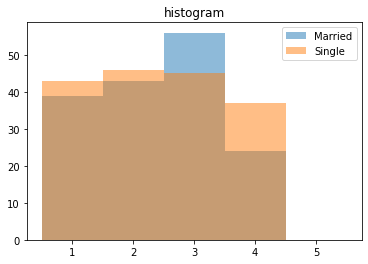

In [72]:
from matplotlib import pyplot as plt 
import numpy as np  

data_train_np = data_train.loc[data_train["GroupIndex"]==0]["rank"].to_numpy() 
plt.hist(data_train_np, bins = [0.5,1.5,2.5,3.5,4.5,5.5],alpha=0.5,label="Married") 
data_train_np_2 = data_train.loc[data_train["GroupIndex"]==1]["rank"].to_numpy() 
plt.hist(data_train_np_2, bins = [0.5,1.5,2.5,3.5,4.5,5.5],alpha=0.5,label = "Single") 
plt.legend(loc='upper right')
plt.title("histogram") 
plt.show()

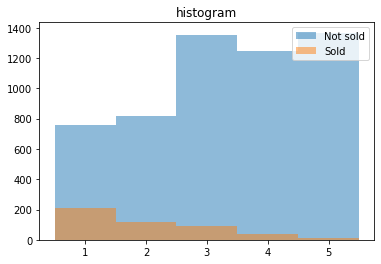

In [42]:
notsold_np = data_train.loc[data_train["policies_sold"]==0]["rank"].to_numpy() 
plt.hist(notsold_np, bins = [0.5,1.5,2.5,3.5,4.5,5.5],alpha=0.5,label = "Not sold") 

sold_np = data_train.loc[data_train["policies_sold"]==1]["rank"].to_numpy() 
plt.hist(sold_np, bins = [0.5,1.5,2.5,3.5,4.5,5.5],alpha=0.5,label="Sold") 
plt.legend(loc='upper right')
plt.title("histogram") 
plt.show()

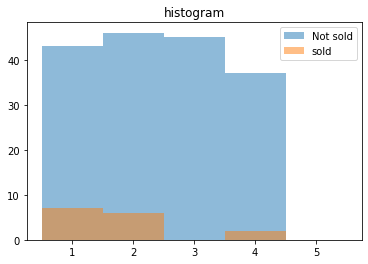

In [71]:
Group0NotSold = data_train.loc[data_train["GroupIndex"]==3]["rank"].to_numpy() 
plt.hist(Group0NotSold, bins = [0.5,1.5,2.5,3.5,4.5,5.5],alpha=0.5,label="Not sold") 

Group0Sold = data_train.loc[(data_train["GroupIndex"]==3) & (data_train["policies_sold"]==1)]["rank"].to_numpy() 
plt.hist(Group0Sold, bins = [0.5,1.5,2.5,3.5,4.5,5.5],alpha=0.5,label = "sold") 

plt.legend(loc='upper right')
plt.title("histogram") 
plt.show()

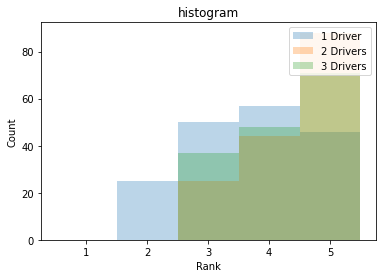

In [74]:
oneDriver = data_train.loc[data_train["GroupIndex"]==0]["rank"].to_numpy() 
plt.hist(oneDriver, bins = [0.5,1.5,2.5,3.5,4.5,5.5],alpha=0.3,label="1 Driver") 
twoDriver = data_train.loc[data_train["GroupIndex"]==4]["rank"].to_numpy() 
plt.hist(twoDriver, bins = [0.5,1.5,2.5,3.5,4.5,5.5],alpha=0.3,label = "2 Drivers") 
threeDriver = data_train.loc[data_train["GroupIndex"]==8]["rank"].to_numpy() 
plt.hist(threeDriver, bins = [0.5,1.5,2.5,3.5,4.5,5.5],alpha=0.3,label = "3 Drivers") 

plt.xlabel("Rank")
plt.ylabel("Count")
plt.legend(loc='upper right')
plt.title("histogram") 
plt.show()